# EasyVisa Project - Ike Imala

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. Analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

## Importing the Dataset

In [ ]:
# Code to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset from mounted google drive using Pandas library
visa = pd.read_csv('/content/drive/MyDrive/Dataset/EasyVisa.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Dataset Overview

In [ ]:
# Displaying  top 5 rows of the dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# Displaying bottom 5 rows of the data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
## Checking the shape of dataset

rows=data.shape[0]
cols=data.shape[1]
print('Rows:' + str(rows))
print('columns:' + str(cols))

Rows:25480
columns:12


**Observations**

* There are 25480 rows and 12 columns in the data

In [ ]:
## Checking data type of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations -**
* There are no null or missing values in the dataset.
* There are 1 float, 2 integer and 9 object data type
* We will convert the object type columns to categories to reduce data space


### Fixing the data types

In [ ]:
# Convert object type data to category
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


Converting the data from object type to category reduces the memory usage from 2,3+ MB to 2.0MB. Not much but something

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

### Summary of the dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observation**

* The no_of_employees column has a lot of outliers to the right.  It appears to be  right-skewed distribution and not a normal distribution.

* Prevailing_wage has outliers as well present in the data. The distribution is skewed to the right. And not a normal distribution.

In [ ]:
data.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


* Case_Status is the target variable with approximately 66% of visa approval
* The prevailing_wage unit of wage was mostly yearly.
* 88% of employees don't require job training
* About 58% of visa applicant requires or has-job_experience
* The education of employee is 40% with a bachelor's degree.
* The Asia continent is the most dominant with 66% employee or applicant


In [ ]:
data.loc[:, 'no_of_employees'].shape ## Complete the code to check negative values in the employee column

(25480,)

In [ ]:
# calculating absolute values for no_of_employees rows with negative value
data['no_of_employees'] = data['no_of_employees'].abs()


In [ ]:
# Summary of dataset after calculating absolute value
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all categorical variables
#cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
#for column in cat_col:
 #   print(data[column].value_counts())
 #   print("*" * 50)

In [ ]:
cols_cat= data.select_dtypes(['category'])

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in case_id are :
EZYV01       1
EZYV25287    1
EZYV25285    1
EZYV25284    1
EZYV25283    1
            ..
EZYV17633    1
EZYV17632    1
EZYV17631    1
EZYV17630    1
EZYV9999     1
Name: case_id, Length: 25480, dtype: int64
**************************************************
Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_

**Checking unique values of case_id**

In [ ]:
# Lets check for unique values in the case_id column
data["case_id"].value_counts()

EZYV01       1
EZYV25287    1
EZYV25285    1
EZYV25284    1
EZYV25283    1
            ..
EZYV17633    1
EZYV17632    1
EZYV17631    1
EZYV17630    1
EZYV9999     1
Name: case_id, Length: 25480, dtype: int64

**Dropping columns which are not adding any information.**

In [ ]:
# We will drop the case_id column since they will not be adding any information
data.drop(["case_id"], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

####**Univariate Analysis**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

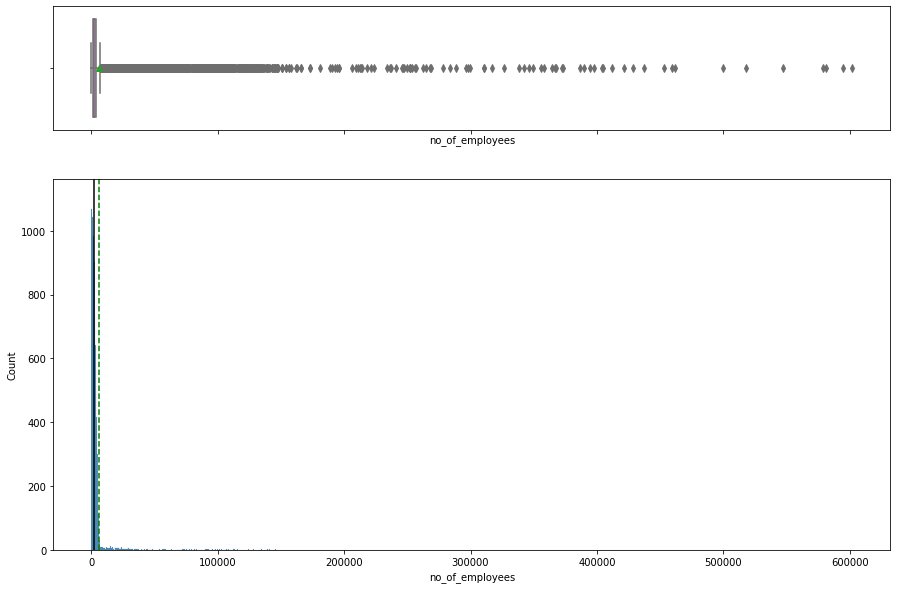

In [ ]:
histogram_boxplot(data, "no_of_employees")

* no_of_employees has a right-skewed distribution with lots of outliers present



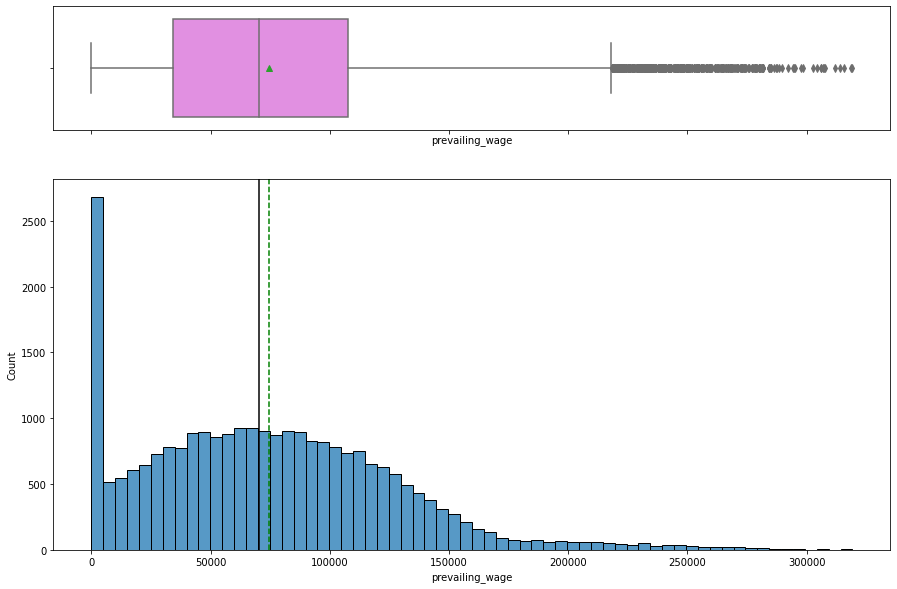

In [ ]:
# code to create histogram_boxplot for prevailing wage
histogram_boxplot(data, "prevailing_wage")

* Prevailing_wage has a right-skewed distribution, it's obviously not a normal distribution

* There is a bit of outlier present towards the right

In [ ]:
data.loc[data['prevailing_wage'] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [ ]:
# get the count of the values in the unit_wage column
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour     176
Month      0
Week       0
Year       0
Name: unit_of_wage, dtype: int64

### Observations

* 176 people earn below 100 with an hourly unit_wage


#### Observations on job experience

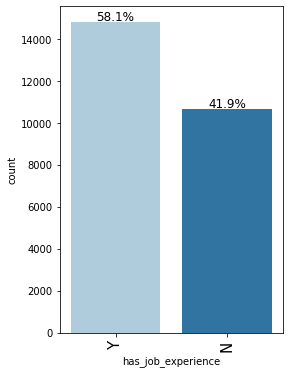

In [ ]:
# Plot distribution for job experience
labeled_barplot(data, 'has_job_experience', perc=True)

### Observation
* About 58.1% of employees has_job experience while 41.9% has no job experience.

#### Observations on job Training

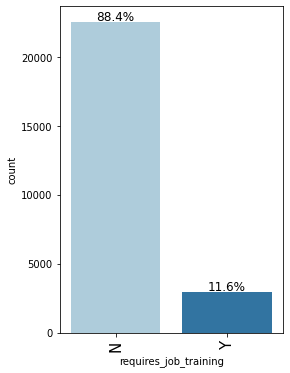

In [ ]:
# Plot Distribution for job training
labeled_barplot(data, 'requires_job_training', perc=True)

### Observation
* 88.4% does not require job training

#### Observations on Continent

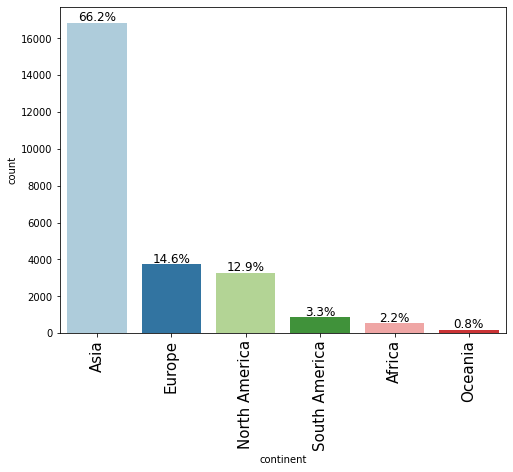

In [ ]:
# Plot distribution on continent
labeled_barplot(data, 'continent', perc=True)

### Observation
* 66% of employees are predominantly from Asia, followed by Europe and next is north america

### Observations on unit of wage

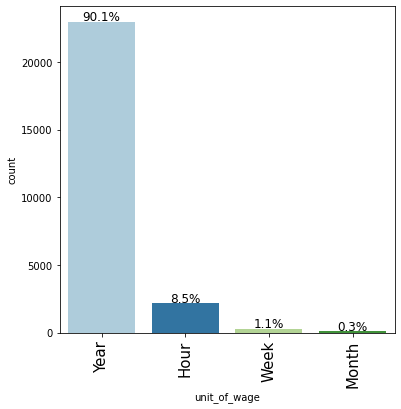

In [ ]:
labeled_barplot(data, 'unit_of_wage', perc=True)

### Observation
* 90% of employees are payed yearly, followed by hourly with 8.5% and weekly with 1.1%

#### Observations on education of employee

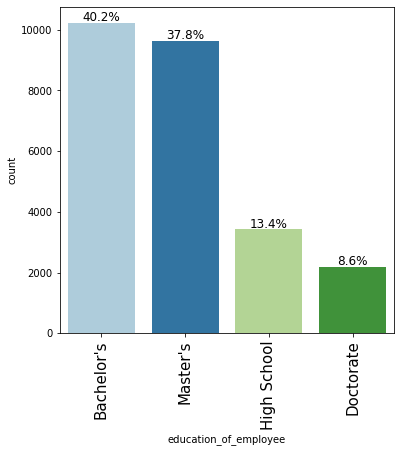

In [ ]:
labeled_barplot(data, 'education_of_employee', perc=True)

###Observation
* Bachelor's degree education is the most education of employees with 40.2%, followed by master's with 37.8%

#### Observations on region of employment

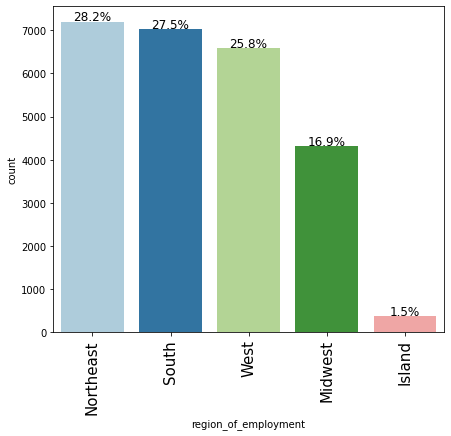

In [ ]:
labeled_barplot(data, 'region_of_employment', perc=True)

### Observation
* The foreign worker intended region of employment is Northeast US with 28%, next is south with 27.5% and then West with 25.8%

#### Observations on case status

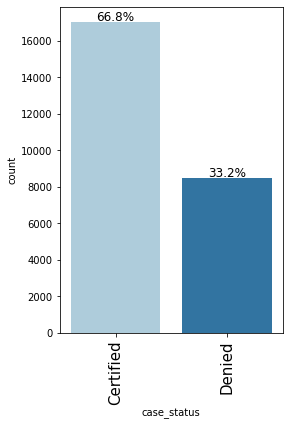

In [ ]:
labeled_barplot(data, 'case_status', perc=True)

### Observation
* 66.8% visa was approved(certified) and 33.2% was denied
* The dataset seems to be a balanced data

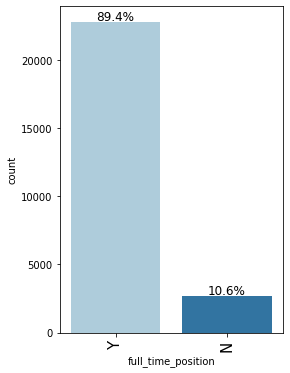

In [ ]:
# Check observation on full_time_position
labeled_barplot(data, 'full_time_position', perc=True)

### Observation
89.4% of the position is a full time position

###**Bivariate Analysis**

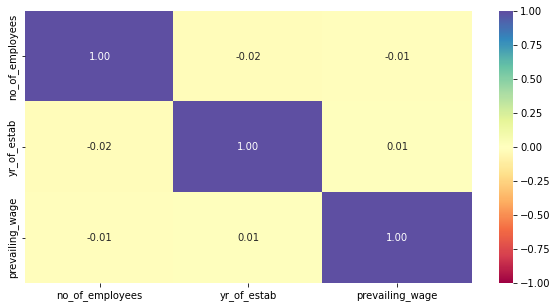

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

### Observation
* There is no multicolinearity present in the data.  There seems to be no correlation between the numerical columns

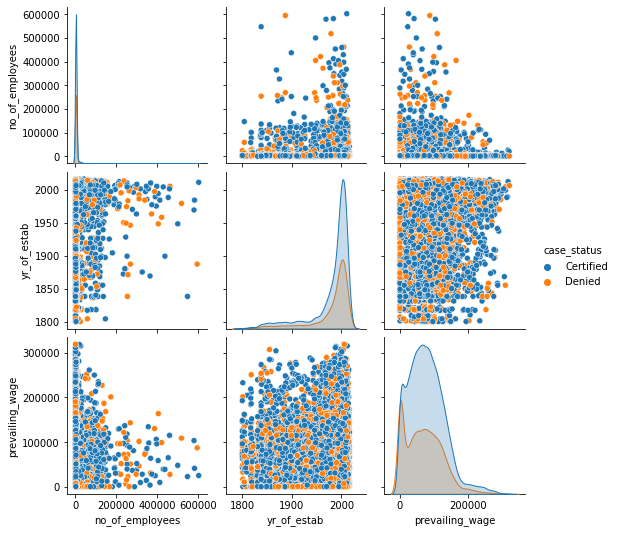

In [ ]:
sns.pairplot(data, hue="case_status")
plt.show()

### Observation
* There are some varying distributions in variables for case_status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


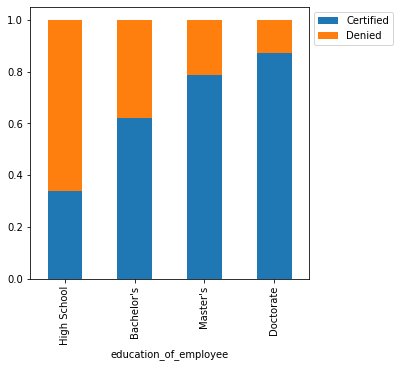

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

### Observation
The percentage ratio of visa approval/certification versus denial is higher with people having higher degree like doctorate with 87% approval compared to the rest with lower education

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


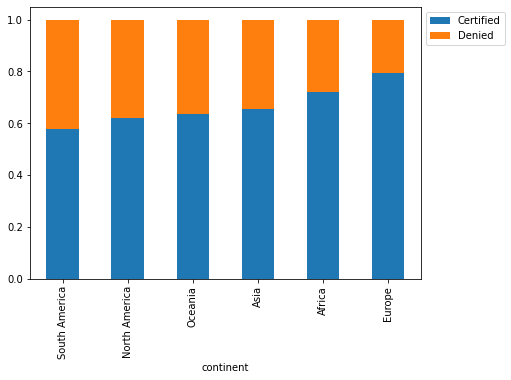

In [ ]:
## plot stacked barplot for continent and case status
stacked_barplot(data, 'continent', 'case_status')

### Observation

* Across all continent, Europe has the highest number of certified visa in terms of percentage by applicants with 88% of visa certified

* Next is Africa with 72% of visa certified
* Then Asia and Oceania.
* The continent with the most visa denial by applicant/employee is south America

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


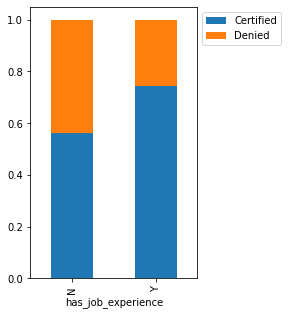

In [ ]:
## plot stacked barplot for job experience and case status
stacked_barplot(data, 'has_job_experience', 'case_status')

### Observation
* Foreign employee who have job experience have a better chance of visa status been certified.  

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


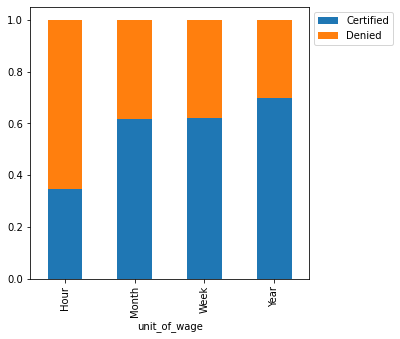

In [ ]:
## plot stacked barplot for unit of wage and case status
stacked_barplot(data, 'unit_of_wage', 'case_status')

### Observation
* The yearly paid intervals are most likely to get certified compared to the rest.

continent              Africa   Asia  Europe  North America  Oceania  \
education_of_employee                                                  
All                       551  16861    3732           3292      192   
Master's                  288   6480    1097           1408       68   
Bachelor's                143   7168    1299           1225       66   
High School                66   2290     490            401       36   
Doctorate                  54    923     846            258       22   

continent              South America    All  
education_of_employee                        
All                              852  25480  
Master's                         293   9634  
Bachelor's                       333  10234  
High School                      137   3420  
Doctorate                         89   2192  
------------------------------------------------------------------------------------------------------------------------


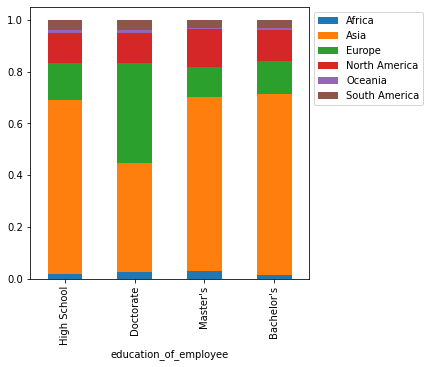

In [ ]:
## plot stacked barplot education_of_employee and continent
stacked_barplot(data, 'education_of_employee', 'continent')

### Observation

* Asia and Europe has the most number of applicants with doctorate education.

* The highest number of master's and bachelor's degree applicant is from Asia

* South America has the least number of education background attained.

case_status                1     0    All
requires_job_training                    
All                    17018  8462  25480
N                      15012  7513  22525
Y                       2006   949   2955
------------------------------------------------------------------------------------------------------------------------


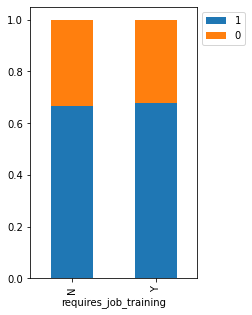

In [ ]:
## plot stacked barplot for requires_job_training and case status
stacked_barplot(data, 'requires_job_training', 'case_status')

### Observation

* Requires_job_training or not has not much effect on the visa status

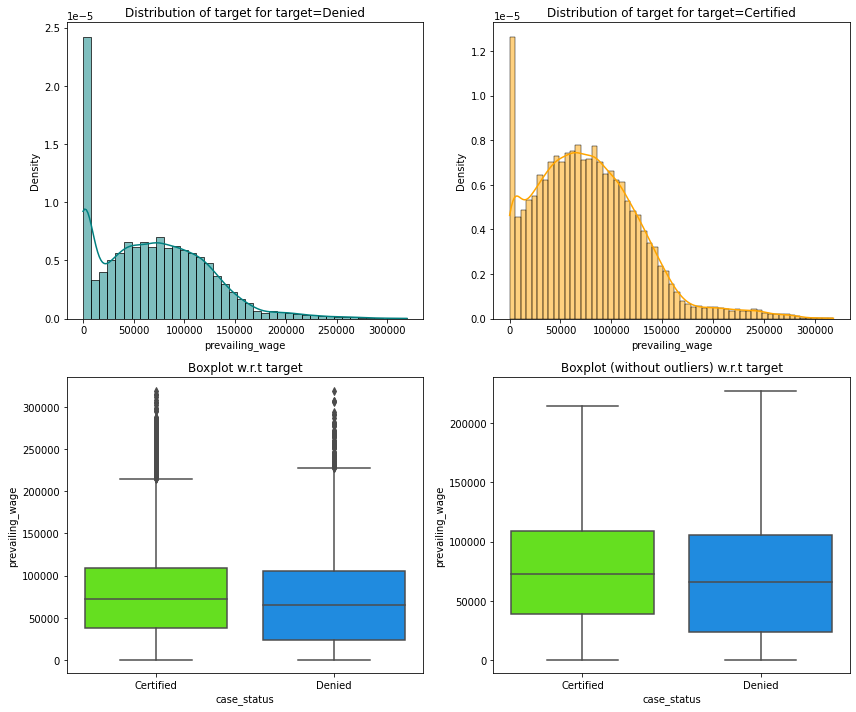

In [ ]:
# Distribution of prevailing wage and case status
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

### Observation

The prevailing_wage doesn't really affect the visa status.  Most wage between 50000 - 10000 are likely to get visa certified.

**Checking if the prevailing wage is similar across all the regions of the US**

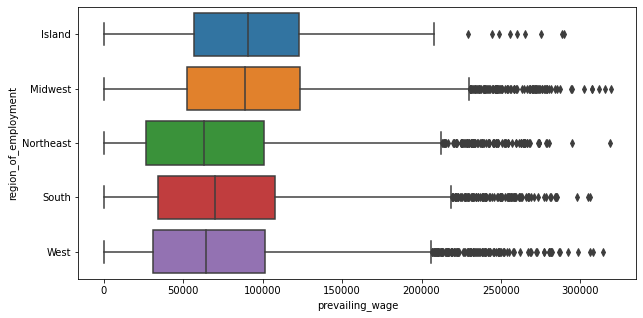

In [ ]:
#create boxplot for region of employment and prevailing wage
plt.figure(figsize=(10, 5))
sns.boxplot(y="region_of_employment", x="prevailing_wage", data=data)
plt.show()

### Observation
* Island and Midwest region of employment has the most prevailing_wage.
* Northeast and the west has same prevailing wage with the least wage.  
* Although the variation in prevailing_wages across the regions are not that significant

## Data Preprocessing


### Outlier Detection and Treatment

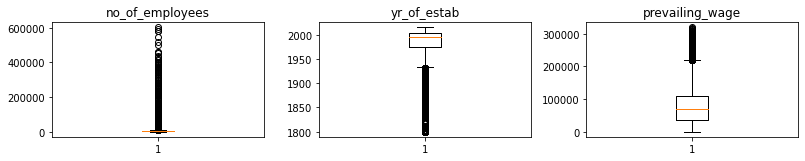

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are quite a few outliers present in the numerical variables column.
- However, we will not treat them

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. This is done using the `stratify` parameter in the train_test_split function.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

## Dropping case status from the data
X = data.drop(['case_status'],axis=1)
y = data["case_status"]


## create dummies for X
X = pd.get_dummies(X, drop_first=True)



####**Splitting data into training and test set**

In [ ]:
# Splitting data into training and test set in the ratio 70:30:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [ ]:
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [ ]:
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used as the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
* In this case, we can specify the weight of each class as balanced

* class_weight is a hyperparameter for the decision tree classifier.

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight="balanced",random_state=1)

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

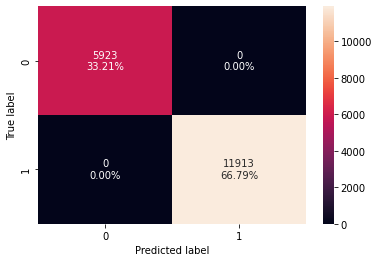

In [ ]:
confusion_matrix_sklearn(dtree, X_train, y_train)

**Confusion Matrix -**

* Employee left and the model predicted it correctly that is employee will attrite :  True Positive (observed=1,predicted=1)

* Employee didn't leave and the model predicted employee will attrite : False Positive (observed=0,predicted=1)

* Employee didn't leave and the model predicted employee will not attrite : True Negative (observed=0,predicted=0)

* Employee left and the model predicted that employee won't : False Negative (observed=1,predicted=0)

In [ ]:
# checking performance on train data
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### **Checking model performance on test set**

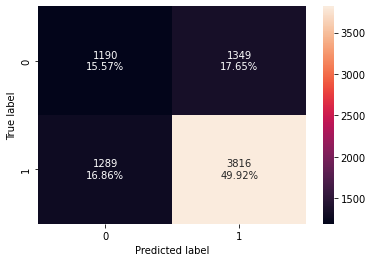

In [ ]:
# confusion matrix for test data
confusion_matrix_sklearn(dtree, X_test, y_test)

In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.654893  0.747502   0.738819  0.743135


Observation

* Decision tree model is working well on the training data but is not able to generalize well on the test data with regards to F1 score which is our metric for evaluating our model.  The other metric as well dropped

* There is obviously overfitting here since the F1 score dropped almost 30%.

### **Hyperparameter Tuning - Decision Tree**

In [ ]:
# Choosing the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5, n_jobs= -1)

## Fit the grid_obj on the train data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### **confusion matrix for train data on tuned estimator**

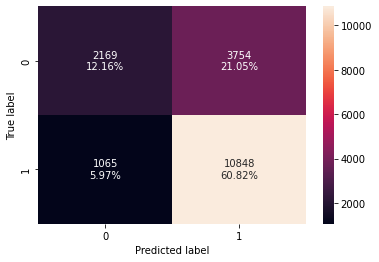

In [ ]:
#confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [ ]:
# Checking performance for train data on tuned dtree_estimator
dtree_estimator_tune_perf_train= model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.729816,0.910602,0.742912,0.818254


####**Confusion matrix for test data on tuned estimater**

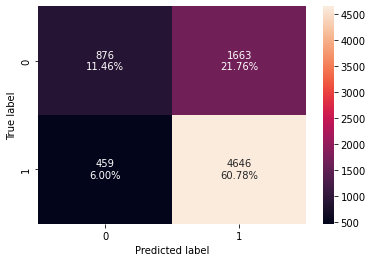

In [ ]:
## Create confusion matrix for test data on tuned dtree_estimator
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [ ]:
## check performance for test data on tuned dtree_estimator
dtree_estimator_tune_perf_test = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.722397,0.910088,0.736408,0.814088


* The model is giving a generalized result now since the F1 scores on both the train and test data are coming to be around 0.81% which is relatively okay. It shows that the model is able to generalize well on unseen data.

## Building bagging and boosting models

### Bagging Classifier

In [ ]:
## Bagging classifier definition and fitting to train data
bagging_classifier = BaggingClassifier(random_state=1)

## fitting bagging classifier on the train data
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

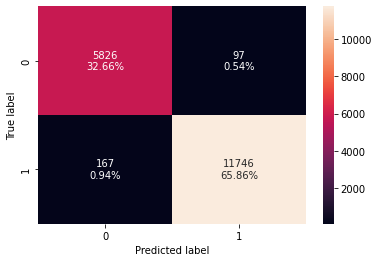

In [ ]:
## confusion matrix for train data
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [ ]:
## Code to check performance on train data
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
print("Training performance \n",bagging_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


#### **Checking model performance on test data**

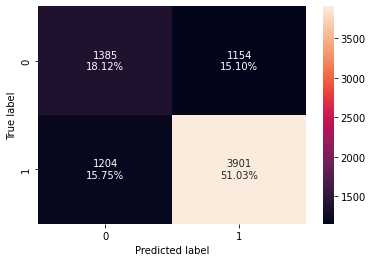

In [ ]:
## confusion matrix for test data
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [ ]:
## check performance for test data
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
print("Testing performance \n",bagging_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of F1 score.

### **Hyperparameters tuning to improve the model performance**?

#### Grid search for bagging classifier

In [ ]:
##Grid search for bagging classifier
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)

## Fit the grid_obj on train data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set after hyperparamter tunning

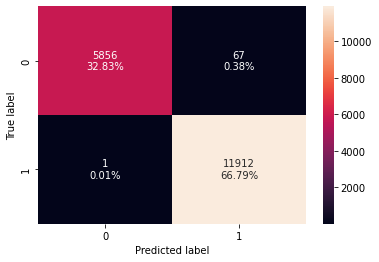

In [ ]:
## confusion matrix for Train data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [ ]:
## Check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


#### Checking model performance on test set after hyperparamter tunning

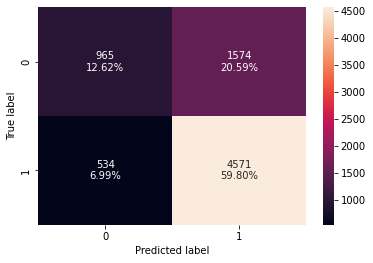

In [ ]:
## confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [ ]:
## Code to check performance on test data
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
print("Training performance \n",bagging_estimator_tuned_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.724228  0.895397   0.743857  0.812622


* F1 score model performance is relatively okay, however it has dropped as well as accuracy, Recall and precision. This signifies the model is overfitting on the training dataset

### Random Forest

In [ ]:
# code to define random forest with random state = 1 and class_weight = balanced
rf_estimator = RandomForestClassifier(class_weight= "balanced", random_state=1)

# code to fit random forest on the train data
rf_estimator.fit(X_train,y_train)



RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

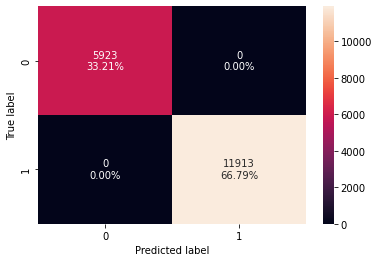

In [ ]:
## confusion matrix for train data
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

In [ ]:
# Calculating different metrics(code to check performance on train data)
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

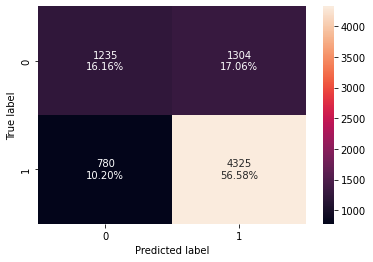

In [ ]:
## confusion matrix for test data
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [ ]:
# Calculating different metrics(code to check performance on test data)
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


* Random Forest performed well in terms of accuracy, precision, Recall and F1 score for the training dataset but it is not able to generalize well on the test data in terms of F1 score, hence possible overfitting in the test dataset

### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5 and n_jobs = -1
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs = -1)

## Fit the grid_obj on train data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

#### Checking model performance of tuned random forest on  training set

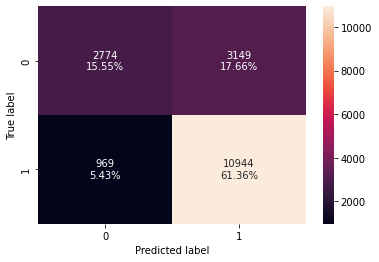

In [ ]:
# Code to create confusion matrix for train data on tuned estimator(random forest)
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

In [ ]:
# Code to check performance for train data on tuned estimator
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


#### Checking model performance of tuned random forest on  test dataset

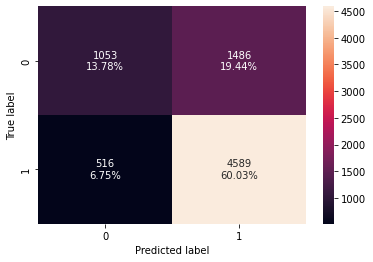

In [ ]:
# Code to create confusion matrix for test data on tuned estimator(random forest)
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [ ]:
# Code to check performance for test data on tuned estimator
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


* Random Forest after tunning seems to generalize well in terms of accuracy, precision, Recall and F1_score for the training dataset as well as the test dataset.
* The model performance seems very okay on both dataset.
* We will try to tune the model further to see if we can imporove the model better.

### Boosting - Model Building and Hyperparameter Tuning

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)



    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))


    return score_list # returning the list with train and test scores

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### AdaBoost Classifier

In [ ]:
# Code to define AdaBoost Classifier with random state = 1
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on train set

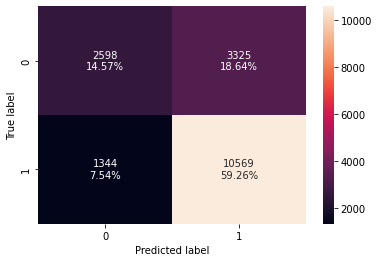

In [ ]:
# Perform confusion matrix for train data for AdaBoost
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [ ]:
# Code to check performance for train data
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


#### Checking model performance on test set

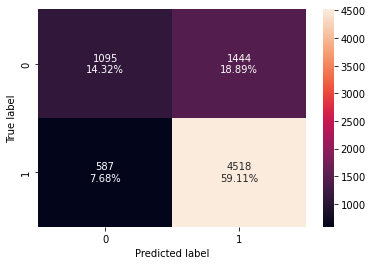

In [ ]:
# Perform confusion matrix for test data for AdaBoost
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [ ]:
# Code to check performance for test data
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


- AdaBoost is generalizing well but gives slight less performance comapred to Random forest model perfomance in terms of F1 score.  Although the difference is not much significant.

- Lets try to improve the model performance a little more by tunning



### Hyperparameter Tuning - AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking tuned model performance on training set (Adaboost)

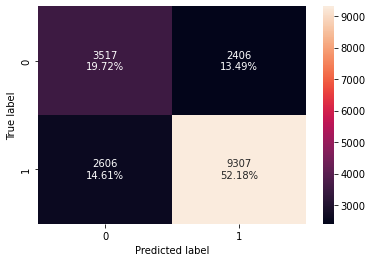

In [ ]:
# Code to create confusion matrix for train data on tuned estimator (Adaboost)
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [ ]:
# checking performance for train data on tuned estimator
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


#### Checking tuned model performance on test set (Adaboost)

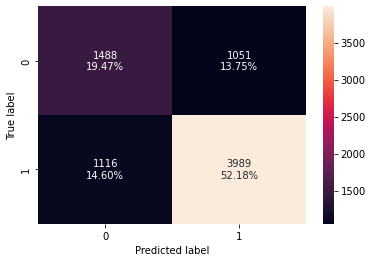

In [ ]:
# Code to create confusion matrix for test data on tuned estimator (Adaboost)
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [ ]:
# checking performance for test data on tuned estimator
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


### Insights
- The model is well generalized on both training and test data in terms of F1 score however tunning the model dropped the performance on both dataset in comparison to the untuned model


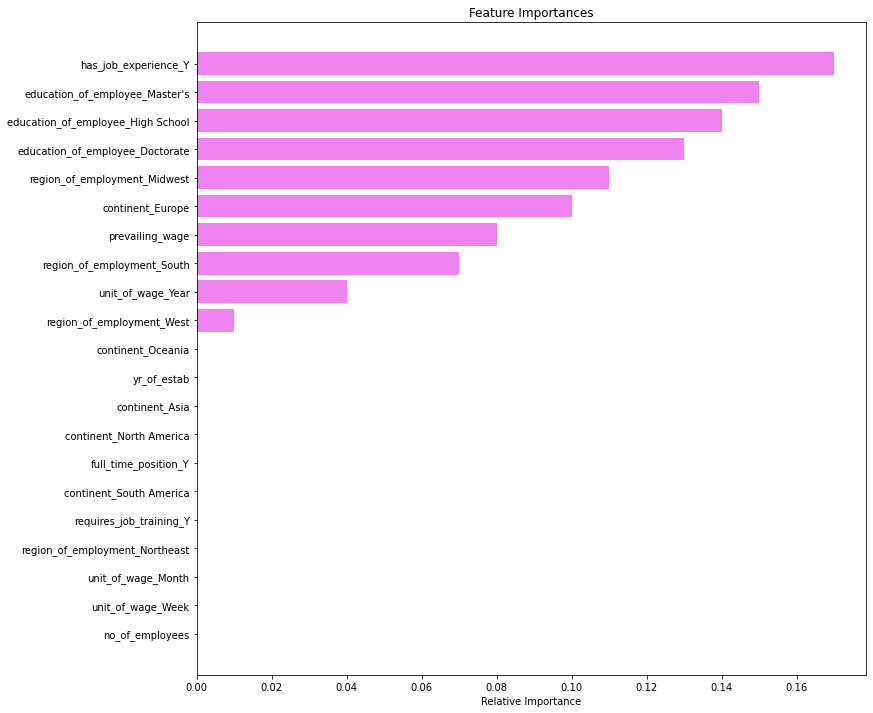

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Has_job_experience is the most important feature based on the AdaBoost model.

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [ ]:
# Define Gradient Boosting Classifier with random state = 1
gb_classifier = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Fit Gradient Boosting Classifier on the train data
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Checking model performance on training set

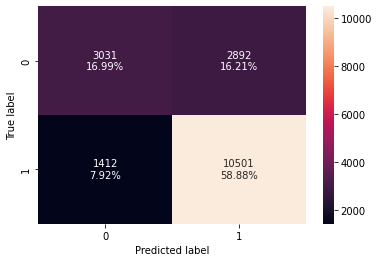

In [ ]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [ ]:
# check model performance on train data
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75869,0.881474,0.784066,0.829922


#### Checking model performance on test dataset

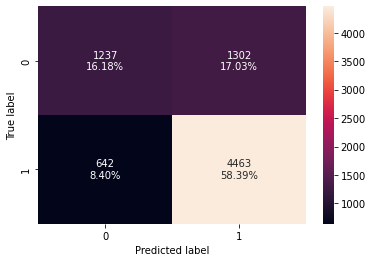

In [ ]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [ ]:
# check model performance on test data
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745683,0.874241,0.774154,0.821159


### Insights
- The model is well generalized on both training and test data in terms of F1 score

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)

## fit the grid_obj on train data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking gbc_tuned model performance on training set

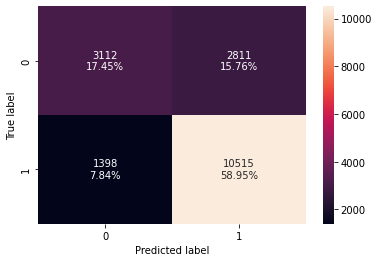

In [ ]:
## Run confusion matrix for train data on tuned estimator (Gradient Boosting classifier)
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [ ]:
# check model performance for train data on tuned estimator
gb_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


#### Checking gbc_tuned model performance on test set

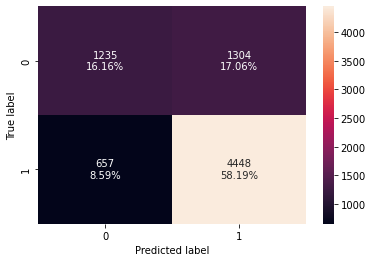

In [ ]:
## Run confusion matrix for test data on tuned estimator (Gradient Boosting classifier)
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [ ]:
# check model performance for test data on tuned estimator
gb_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


### Insights
- The gradient boosting after tunned model is well generalized on both training and test data in terms of F1 score. A bit of drop in the F1 score compared to the trained dataset, however still a good model performance.   

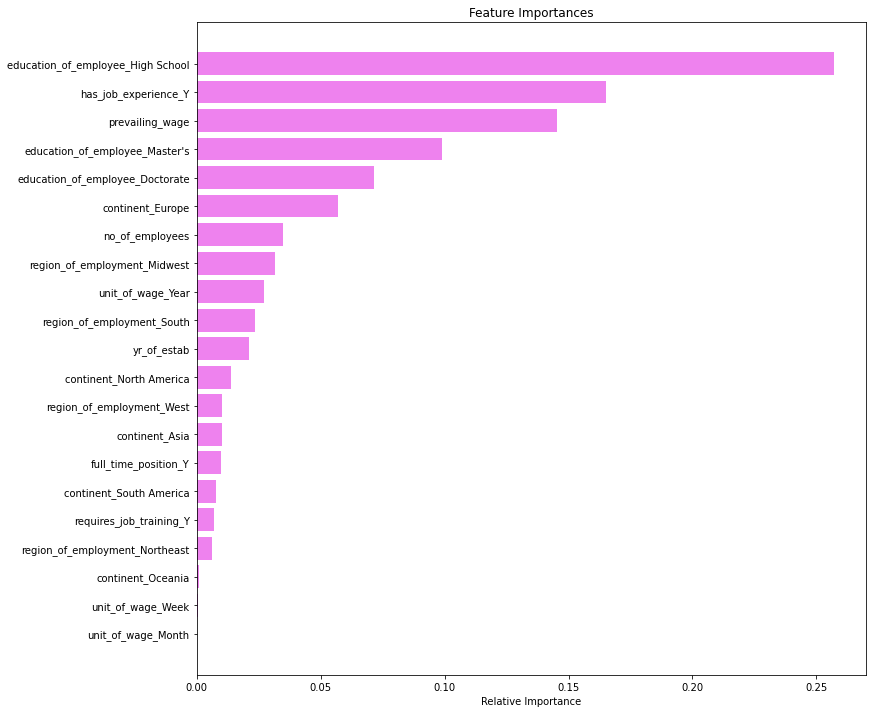

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Education_of_employee_high_school is the most important feature, followed by has_job_experience, as per the tuned gradient boosting model

### XGBoost Classifier

In [ ]:
## code to define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier = XGBClassifier(random_state=1,eval_metric='logloss')

## fit XGBoost Classifier on the train data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

### Checking model performance on training set

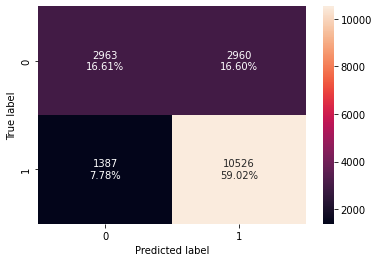

In [ ]:
### create confusion matrix for train data
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)


In [ ]:
# check model performance for train data
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756279,0.883573,0.780513,0.828852


### Checking model performance on test set

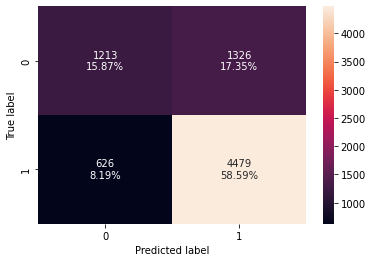

In [ ]:
# create confusion matrix for test data
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [ ]:
# check model performance for test data
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744636,0.877375,0.771576,0.821082



- The XGboost model is well generalized on both training and test data in terms of F1 score.
- We will attempt to tune the model to see if we can improve the model.

### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choosing the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer,cv=5)

## fit the grid_obj on train data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

#### Checking model performance on training set after XGB Tunning

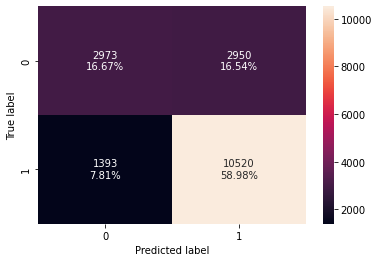

In [ ]:
 # creating confusion matrix for train dataset
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [ ]:
# checking model performance for train data
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756504,0.883069,0.780995,0.828901


#### Checking model performance on test set after XGB Tuning

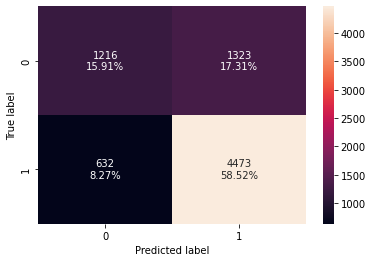

In [ ]:
# creating confusion matrix for test data
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [ ]:
# checking model performance for test data
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744244,0.8762,0.771739,0.820659


- After performing hyperparameter tuning on the XGBoost model, there is not much change to the model.  Therefore hypertunning was not helpful
- The test accuracy of the model reduced a bit as compared to the model with default parameters but the F1 score did not change significantly and the model is able to predict .
- The tuned model is not overfitting and generalizes well.

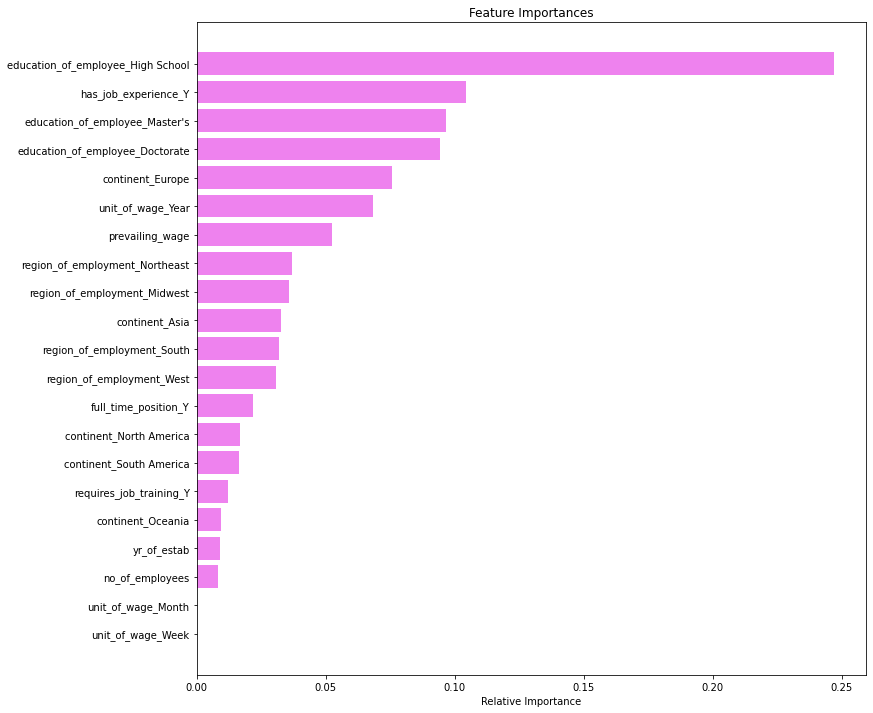

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Stacking Classifier

In [ ]:
estimators = [("AdaBoost", ab_classifier),("Gradient Boosting", gbc_tuned),("Random Forest", rf_tuned)]

final_estimator = xgb_tuned

## write code to define Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)

## fit Stacking Classifier on the train data
stacking_classifier.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                         

### Checking model performance on training set for Stacking Classifier

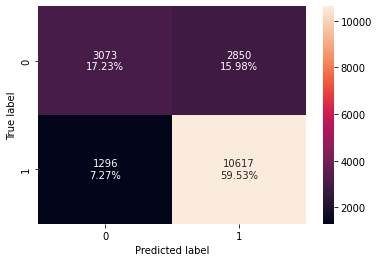

In [ ]:
### creating confusion matrix for train dataset
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [ ]:
## Code to check performance on train data
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767549,0.891211,0.788372,0.836643


### Checking model performance on test set for Stacking Classifier

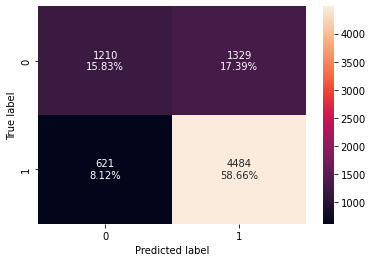

In [ ]:
# creating confusion matrix for test dataset
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [ ]:
# check performance on test data
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767549,0.891211,0.788372,0.836643


### Insights
- The stacking model is well generalized on both training and test data in terms of F1 score. The accuracy of the model is also consistent on both train and test dataset.  
- The model is not overfitting and generalizes well.
- The stacking model seems to appear well generalized and have a better chance of predicting accurately.
- There is no overfitting
- However we can still concluded that the XGBoost original model produced similar result consistent with the tuned on both train and test dataset. The results are also similar or very close to the F1 score obatined in the stacking model.

## Model Performance Comparison and Conclusions

### Comparison of train model performance metrics for all model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_tune_perf_train.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gb_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.729816,0.985198,0.996187,1.0,0.769119,0.738226,0.718995,0.764017,0.764017,0.756504,0.756504,0.767549
Recall,1.0,0.910602,0.985982,0.999916,1.0,0.918660,0.887182,0.781247,0.882649,0.882649,0.883069,0.883069,0.891211
Precision,1.0,0.742912,0.991810,0.994407,1.0,0.776556,0.760688,0.794587,0.789059,0.789059,0.780995,0.780995,0.788372
F1,1.0,0.818254,0.988887,0.997154,1.0,0.841652,0.819080,0.787861,0.833234,0.833234,0.828901,0.828901,0.836643


### Comparison of test model performance metrics for all model

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_estimator_tune_perf_test.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gb_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.654893,0.722397,0.724228,0.724228,0.727368,0.738095,0.734301,0.716510,0.743459,0.743459,0.744244,0.744244,0.744898
Recall,0.747502,0.910088,0.895397,0.895397,0.847209,0.898923,0.885015,0.781391,0.871303,0.871303,0.876200,0.876200,0.878355
Precision,0.738819,0.736408,0.743857,0.743857,0.768343,0.755391,0.757799,0.791468,0.773296,0.773296,0.771739,0.771739,0.771375
F1,0.743135,0.814088,0.812622,0.812622,0.805851,0.820930,0.816481,0.786397,0.819379,0.819379,0.820659,0.820659,0.821396


## Actionable Insights and Recommendations

- The XGBoost model generalizes well for both train and test dataset.  The tuned XGBoost model also produces closely similar performance with the default model with a relatively high and generalized F1 score on both train and test.  Therefore XGBoost model is the best model for predicting accurately by minimizing the false negative and false positive.

- Since most of the applicants from Asia and Europe have the highest number of doctorate/master's educational degree, we can focus more on this continent for likely visa approval

- The High F1 score indicates that the model is able to predict or certify/deny visa correctly based on the XGBoost model.

- The most important feature predicted by the XGBoost model is education_of_employee with high school, followed by has_job_ecperience and education_of_employee_Master's.

- Employee who attained doctorate degree are more likely to get visa approval or certified. While people with high_school education are less likely to get visa denial.

- Candidate with job experience and higher educational degree are more likely to get visa certified.

- Since the number of applicant have increased significantly, I suggest filtering the applicants based on job experience and higher educational degree.
